 The dataset which has been used to perform logistic regression is that of loan payments
 The dataset can be described as following:
 Loand_ID : loan id of the person who has taken a loan
Loan_status : Has it been paidoff or not.
Principal : the principal amount of loan
terms : Number of terms for which the loan is repayable
Effective_date : start date of the loan
due_date : The date till which it has to be paid
Paid_off_time : time taken to pay back the loan
past_Due_days : the days by which the person has faulted in repaying the loan
age : age of the person 
education : education degree as bachelor, college and high school or below

The logistic regression is being performed on the dataset to predict whether a male or female would have taken a loan.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve


C:\Users\gaura\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
import pandas as pd
df1=pd.read_csv("C:/Users/gaura/Downloads/Loan payments data.csv")
df1.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [5]:
df1.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [6]:
df1.apply(lambda x: sum(x.isnull()), axis=0)
#there are missing values

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [7]:
df2=df1.copy()

In [8]:
df2.dropna(inplace=True)
df2.isnull().sum()
#Dropping NA values as they lead to inconsistency

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

In [9]:
df2.describe()

,Principal,terms,past_due_days,age
count,100.000000,100.000000,100.000000,100.000000
mean,957.000000,23.920000,9.160000,31.340000
std,91.292625,7.525955,12.543033,6.312118
min,500.000000,7.000000,1.000000,21.000000
25%,1000.000000,15.000000,2.000000,26.000000
50%,1000.000000,30.000000,3.000000,30.000000
75%,1000.000000,30.000000,12.000000,35.000000
max,1000.000000,30.000000,56.000000,49.000000


In [10]:

df2.isnull().values.any().sum()

0

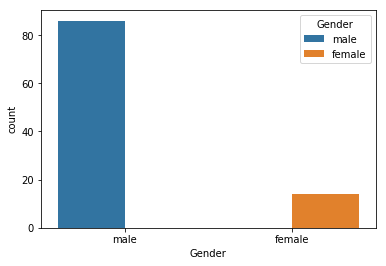

In [11]:
ax = sns.countplot(x="Gender", data=df2, hue="Gender")
plt.show()
#we can see male take more loans than female

In [12]:
categorical_cols = ['education']
for c in categorical_cols:
    df2[c] = pd.factorize(df2[c])[0]
df2.head(3)
#turning string into numeric value

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
400,xqd20160401,COLLECTION_PAIDOFF,1000,30,9/9/2016,10/8/2016,10/10/2016 11:45,2.0,26,0,male
401,xqd20160402,COLLECTION_PAIDOFF,1000,15,9/9/2016,9/23/2016,9/27/2016 17:00,4.0,28,0,male
402,xqd20320403,COLLECTION_PAIDOFF,1000,30,9/9/2016,11/7/2016,11/20/2016 14:10,13.0,39,0,male


In [13]:
dummy_ranks = pd.get_dummies(df2['education'], prefix='education')
dummy_ranks.head()
#dummification of education as they also seem significant in prediction 

,education_0,education_1,education_2
400,1,0,0
401,1,0,0
402,1,0,0
403,0,1,0
404,0,0,1


In [14]:
keep = ['Principal', 'terms',
        'past_due_days','age']
df2_dummy = df2[keep].join(dummy_ranks.ix[:, 'education_0':])
df2_dummy.head()

C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,Principal,terms,past_due_days,age,education_0,education_1,education_2
400,1000,30,2.0,26,1,0,0
401,1000,15,4.0,28,1,0,0
402,1000,30,13.0,39,1,0,0
403,1000,15,5.0,29,0,1,0
404,800,15,3.0,33,0,0,1


In [31]:
df2['Gender']=pd.factorize(df2['Gender'])[0]
#Making male and female as boolean values for male=0 and female=1

In [33]:
df1.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

In [34]:
pred=['Principal', 'terms',
        'past_due_days','age','education_0','education_1','education_2']
pred

['Principal',
 'terms',
 'past_due_days',
 'age',
 'education_0',
 'education_1',
 'education_2']

In [38]:
x = df2_dummy[pred]
print(x.shape,'X')
#setting target
y = df2[target]
print(y.shape,'Y')

(100, 7) X
(100, 1) Y


In [37]:
target=['Gender']
target

['Gender']

In [39]:
#setting predictor fields
x = df2_dummy[pred]
print(x.shape,'X')
#setting target
y = df2[target]
print(y.shape,'Y')

(100, 7) X
(100, 1) Y


In [41]:
type(x)
type(y)

pandas.core.frame.DataFrame

In [42]:
#regressions
lr = LogisticRegression(C=1e9)

#dividing data to have a training and a testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2, random_state=0)

# Logistic regression metrics
LRm = lr.fit(x_train, y_train)



LRm.predict_proba(x_test) 

C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 0.81783501,  0.18216499],
       [ 0.88037407,  0.11962593],
       [ 0.82057979,  0.17942021],
       [ 0.84762217,  0.15237783],
       [ 0.91672978,  0.08327022],
       [ 0.91071058,  0.08928942],
       [ 0.91336871,  0.08663129],
       [ 0.82734183,  0.17265817],
       [ 0.78960276,  0.21039724],
       [ 0.84673154,  0.15326846],
       [ 0.86430091,  0.13569909],
       [ 0.97330034,  0.02669966],
       [ 0.97036277,  0.02963723],
       [ 0.83310726,  0.16689274],
       [ 0.93947572,  0.06052428],
       [ 0.93801197,  0.06198803],
       [ 0.84582653,  0.15417347],
       [ 0.84633025,  0.15366975],
       [ 0.86097853,  0.13902147],
       [ 0.96198323,  0.03801677]])

In [43]:

LRm.coef_

array([[-0.00430789,  0.03078563, -0.03711651,  0.07114423,  0.13358482,
        -1.05132902,  0.35609412]])

In [44]:
LRm.intercept_

array([-0.56165008])

In [45]:
#predict score 
LRm.decision_function(x_test)

array([-1.5017478 , -1.9959773 , -1.52028059, -1.71607183, -2.39872171,
       -2.32234217, -2.35547854, -1.56690421, -1.32253261, -1.70919266,
       -1.85148112, -3.59604169, -3.48863879, -1.60781109, -2.74227744,
       -2.71682136, -1.70223587, -1.70610387, -1.82344122, -3.2309697 ])

In [46]:
LRm.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [47]:
y_pred = LRm.predict(x_test)
print("Accuracy score of the regression %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score of the regression 0.9


In [48]:
k=10 #10 fold cross validations
acc=[]
for i in range(k):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=i)
    # metrics
    LRm = lr.fit(x_train, y_train)
    a=metrics.accuracy_score(y_test, LRm.predict(x_test))
    acc.append(a)
    
print (acc)
print (np.mean(acc))
print (np.std(acc))

[0.90000000000000002, 0.84999999999999998, 0.75, 0.84999999999999998, 0.69999999999999996, 0.80000000000000004, 0.90000000000000002, 0.94999999999999996, 0.84999999999999998, 0.84999999999999998]
0.84
0.07


C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
knn=KNeighborsClassifier(n_neighbors=8)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4, random_state=42)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
confusion_matrix(y_test, y_pred)


array([[36,  0],
       [ 4,  0]], dtype=int64)

In [51]:
#Classification Report
target_names = ['Male 0', 'Female 1']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

     Male 0       0.90      1.00      0.95        36
   Female 1       0.00      0.00      0.00         4

avg / total       0.81      0.90      0.85        40



C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
y_pred_prob=lr.predict_proba(x_test)[:,1]

In [54]:
fpr, tpr, threshold = roc_curve(y_test,y_pred_prob)

In [55]:
print(fpr, tpr, threshold)

[ 0.          0.02777778  0.02777778  0.16666667  0.16666667  0.25        0.25
  1.        ] [ 0.25  0.25  0.5   0.5   0.75  0.75  1.    1.  ] [  3.76496420e-01   3.38700377e-01   2.97525511e-01   2.55129308e-01
   2.50495333e-01   2.24334231e-01   2.21122081e-01   1.56988025e-07]


The relationship is significant as the coefficient values changes for the dependant variable 'Gender' as compared to education, age, principal, terms, due_days
Since the regression was performed on categorical column which had male as 0 and female as 1, no assumption was violated. 3)Cross-validate the model.
The scores obtained for the model is 0.84 having a standard deviation of 7%